In [1]:
import torch
import models
import image_loader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
model = models.Autoencoder()
model.load_state_dict(torch.load('../trained-models/covid-autoencoder/20201029-125637'))

<All keys matched successfully>

In [10]:
val_img_folder, val_dataset = image_loader.get_image_dataset(root_dir='..\images', split='val', batch_size=1, num_workers=0)

['covid', 'non_covid']


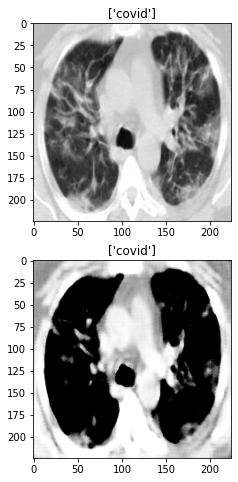

In [25]:

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp, cmap='gray')
    mean = np.array([0.63886562])
    std = np.array([0.27450625])
    inp = std * inp + mean
    plt.imshow(inp, cmap='gray')
    if title is not None:
        plt.title(title)
    #plt.pause(5)

class_names = val_img_folder.classes
# Get a batch of training data
inputs, classes = next(iter(val_dataset))
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(2, 1, 1)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])

inputs = model(inputs).detach()

# # Make a grid from batch
# out = torchvision.utils.make_grid(inputs)
# print(out.shape)
fig.add_subplot(2, 1, 2)
out = inputs[0, :, :, :]
imshow(out, title=[class_names[x] for x in classes])